# Assessing

In [1]:
# Import the libraries
import pandas as pd
import numpy as np

# Create the Dataframe
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
print(red_df.shape)
red_df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(white_df.shape)
white_df.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# To check missing values
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# To check duplicate values
print('Duplicate values in White Wine:',white_df.duplicated().sum())
print('Duplicate values in Red Wine:', red_df.duplicated().sum())

Duplicate values in White Wine: 937
Duplicate values in Red Wine: 240


# Appending Data

## Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.”

In [9]:
# create color array for red dataframe
color_red = np.repeat('red', red_df.shape[0])

# create color array for white dataframe
color_white = np.repeat('white', white_df.shape[0])

In [10]:
#Add arrays to the red and white dataframes.
red_df['color'] = color_red
white_df['color'] = color_white

In [11]:
# Combine DataFrames with Append
# append dataframes
wine_df = red_df.append(white_df)

# view dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [12]:
# Save Combined Dataset
wine_df.to_csv('winequality_edited.csv', index=False)

In [13]:
# Import the new database
df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Is a certain type of wine associated with higher quality?

In [14]:
# Finding the mean quality of each wine type (red and white) with groupby function of pandas
df.groupby('color').mean().quality

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

## Conclusion: The mean quality of red wine is less than to that of white wine

### What level of acidity receives the highest average rating?

In [15]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [16]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01]

# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low']

In [17]:
# Creates acidity_levels column
df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [18]:
# Finding the mean quality of each acidity level with groupby
df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

## Conclusion : Low level of acidity receives the highest average rating

### Do wines with higher alcoholic content receive better ratings?

In [19]:
df['alcohol'].median()

10.3

In [20]:
# select samples with alcohol content less than the median
low_alcohol = df.query('alcohol < 10.3')

# select samples with alcohol content greater or equal to  than the median
high_alcohol = df.query('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [34]:
# get mean quality rating for the low alcohol and high alcohol groups

print('Mean quality rating for Low alcohol group:', low_alcohol.quality.mean())

print('Mean quality rating for High alcohol group:', high_alcohol.quality.mean())

Mean quality rating for Low alcohol group: 5.475920679886686
Mean quality rating for High alcohol group: 6.146084337349397


## Conclusions: Wines with higher alcoholic content generally receive better ratings

### Do sweeter wines receive better ratings?

In [21]:
# get the median amount of residual sugar
df['residual sugar'].median()

3.0

In [22]:
# select samples with residual sugar less than the median
low_sugar = df[df['residual sugar'] < 3]

# select samples with residual sugar greater than or equal to the median
high_sugar = df[df['residual sugar'] >= 3]

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [24]:
# get mean quality rating for the low sugar and high sugar groups
print('Mean quality rating for Low sugar group:', low_sugar.quality.mean())

print('Mean quality rating for High sugar group:', high_sugar.quality.mean())


Mean quality rating for Low sugar group: 5.808800743724822
Mean quality rating for High sugar group: 5.82782874617737


## Conclusion: Sweeter wines generally receive higher ratings.

### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

In [26]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

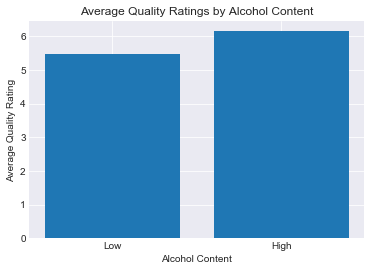

In [27]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [28]:
# Use query to select each group and get its mean quality

median = df['residual sugar'].median()
low = df[df['residual sugar'] < median]
high = df[df['residual sugar'] >= median]

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

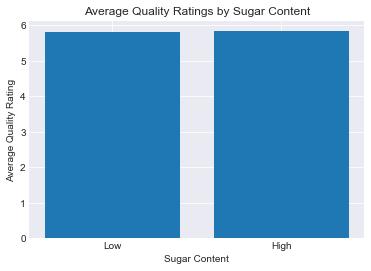

In [29]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating');